## Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Datasets/income_Fairness.csv')
melt_df = pd.read_csv('../Datasets/income_Fairness_melt.csv')

In [2]:
df['cluster_size'] = np.nan_to_num(df.k) + np.nan_to_num(df.u) + np.nan_to_num(df.f)
df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(df.k, df.u)]

melt_df['cluster_size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else np.nan for e, u in zip(melt_df.k, melt_df.u)]

In [3]:
melt_df[melt_df.cluster_type.isnull()].head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,accuracy,0.850434,dpr,0.178923,0.0,NaN
1761,NaN,NaN,NaN,NaN,NaN,NaN,0.01,accuracy,0.591424,dpr,0.028318,0.0,NaN
2642,NaN,NaN,NaN,NaN,NaN,NaN,0.10,accuracy,0.698444,dpr,0.047918,0.0,NaN
3523,NaN,NaN,NaN,NaN,NaN,NaN,1.00,accuracy,0.625444,dpr,0.102253,0.0,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,10.00,accuracy,0.663461,dpr,0.080630,0.0,NaN


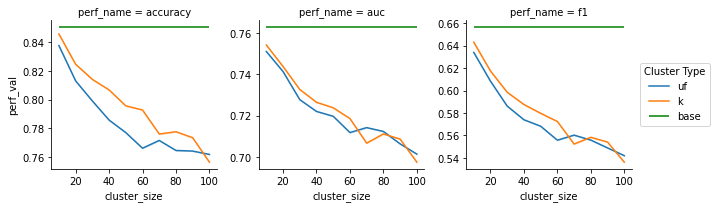

In [4]:
g = sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='perf_name')
g.map(sns.lineplot, "cluster_size", "perf_val")

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

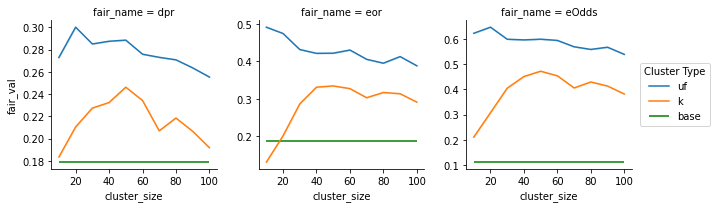

In [5]:
g = (sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='fair_name')
     .map(sns.lineplot, "cluster_size", "fair_val")
    )

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

#### DP Experiments

In [6]:
d = 'income'
melt_df = pd.read_csv('../Datasets/' + d + '_DP_melt.csv')
df = pd.read_csv('../Datasets/' + d + '_DP.csv')
df.rename(columns={'e':'epsilon'}, inplace=True)
df.epsilon.replace({np.nan:0}, inplace=True)

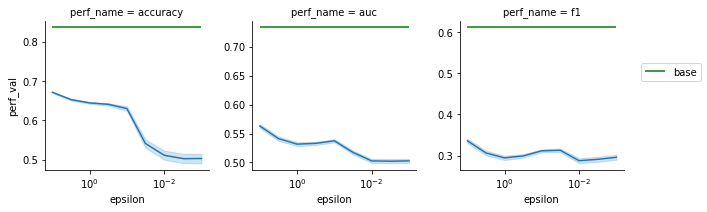

In [7]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='perf_name')
     .map(sns.lineplot, "epsilon", "perf_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

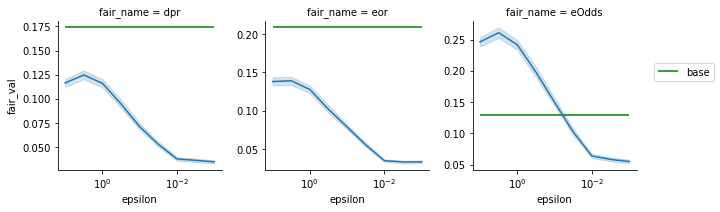

In [8]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='fair_name', col_wrap=3)
     .map(sns.lineplot, "epsilon", "fair_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

In [9]:
dp_df = pd.read_csv('../Datasets/income_DP.csv')
dp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
dp_df.sort_values(by=["fold", "e"], inplace=True)
dp_df['aux'] = list(range(1000))*5
dp_df_avg = dp_df.groupby("aux").mean()
ac=dp_df_avg[dp_df_avg.e.isnull()].accuracy.mean()
dpr=dp_df_avg[dp_df_avg.e.isnull()].dpr.mean()

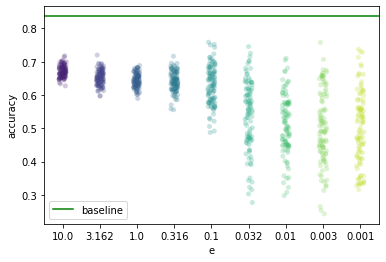

In [10]:
g = sns.stripplot(x="e", y="accuracy", data=dp_df_avg, alpha=.25, palette="viridis_r")
plt.axhline(y=ac, label="baseline", color="green")
plt.legend()
g.invert_xaxis()

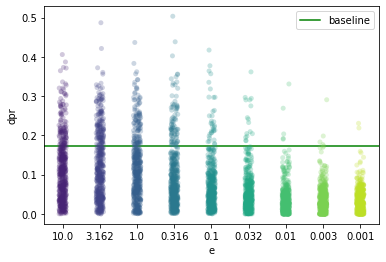

In [11]:
g = sns.stripplot(x="e", y="dpr", data=dp_df, alpha=.25, palette="viridis_r")
plt.axhline(y=dpr, label="baseline", color="green")
plt.legend()
g.invert_xaxis()

In [12]:
df = pd.read_csv('../Datasets/compas_Fairness.csv')
df['method'] = ['dp' + str(e) if e > 0 
                else 'uf' if u > 0 
                else 'k' 
                for e, u in zip(df.epsilon, df.u)]

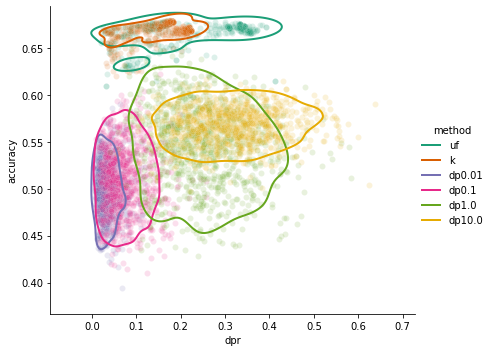

In [13]:
g = (sns.FacetGrid(data=df, hue='method', height=5, aspect=1.2, 
                   palette="Dark2")
     .map(sns.scatterplot, "dpr", "accuracy", alpha=0.15)
     .map(sns.kdeplot, "dpr", "accuracy", levels=2, thresh=0.15, linewidths=2)
     .add_legend()
    )
# plt.xlim(left=-0.05, right=0.55)
# plt.ylim(bottom=0.4)

In [14]:
dsets = ['income', 'compas', 'german']
df_list = [pd.read_csv('../Datasets/' + d + '_Fairness.csv') for d in dsets]
for a,b in zip(dsets, df_list):
    b["dset"] = a

df = pd.concat(df_list)

df['method'] = ['dp' + str(e) if e > 0 
                else 'uf' if u > 0 
                else 'k' 
                for e, u in zip(df.epsilon, df.u)]

(0.25, 0.8100152414460215)

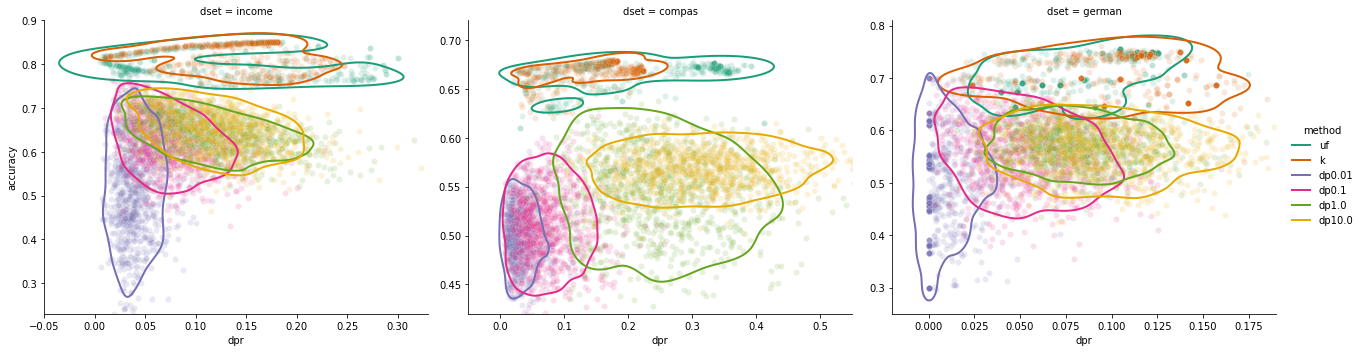

In [15]:
g = (sns.FacetGrid(data=df, col='dset', hue='method', sharex=False, sharey=False, 
                   height=5, aspect=1.2, palette="Dark2")
     .map(sns.scatterplot, "dpr", "accuracy", alpha=0.15)
     .map(sns.kdeplot, "dpr", "accuracy", levels=1, thresh=0.15, linewidths=2)
     .add_legend()
    )
axes = g.axes
axes[0,0].set_xlim(left=-0.05, right=0.33)
axes[0,0].set_ylim(bottom=0.23, top=0.9)
axes[0,1].set_xlim(left=-0.05, right=0.55)
axes[0,1].set_ylim(bottom=0.42, top=0.72)
axes[0,2].set_xlim(left=-0.02, right=0.19)
axes[0,2].set_ylim(bottom=0.25)

# plt.xlim(left=-0.05, right=0.55)
# plt.ylim(bottom=0.4)

## Fairness Correction

In [18]:
melt_df = pd.read_csv('../Datasets/income_Fairness_melt.csv')
melt_df['Cluster Size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['Cluster Size'] = pd.to_numeric( melt_df['Cluster Size'], downcast='integer')
melt_df['Cluster Type'] = ['MDAV' if e > 0 else 'PA Aware' if u > 0 else 'none' for e, u in zip(melt_df.k, melt_df.u)]
melt_df.rename(columns={'tau': 'τ Correction'}, inplace=True)

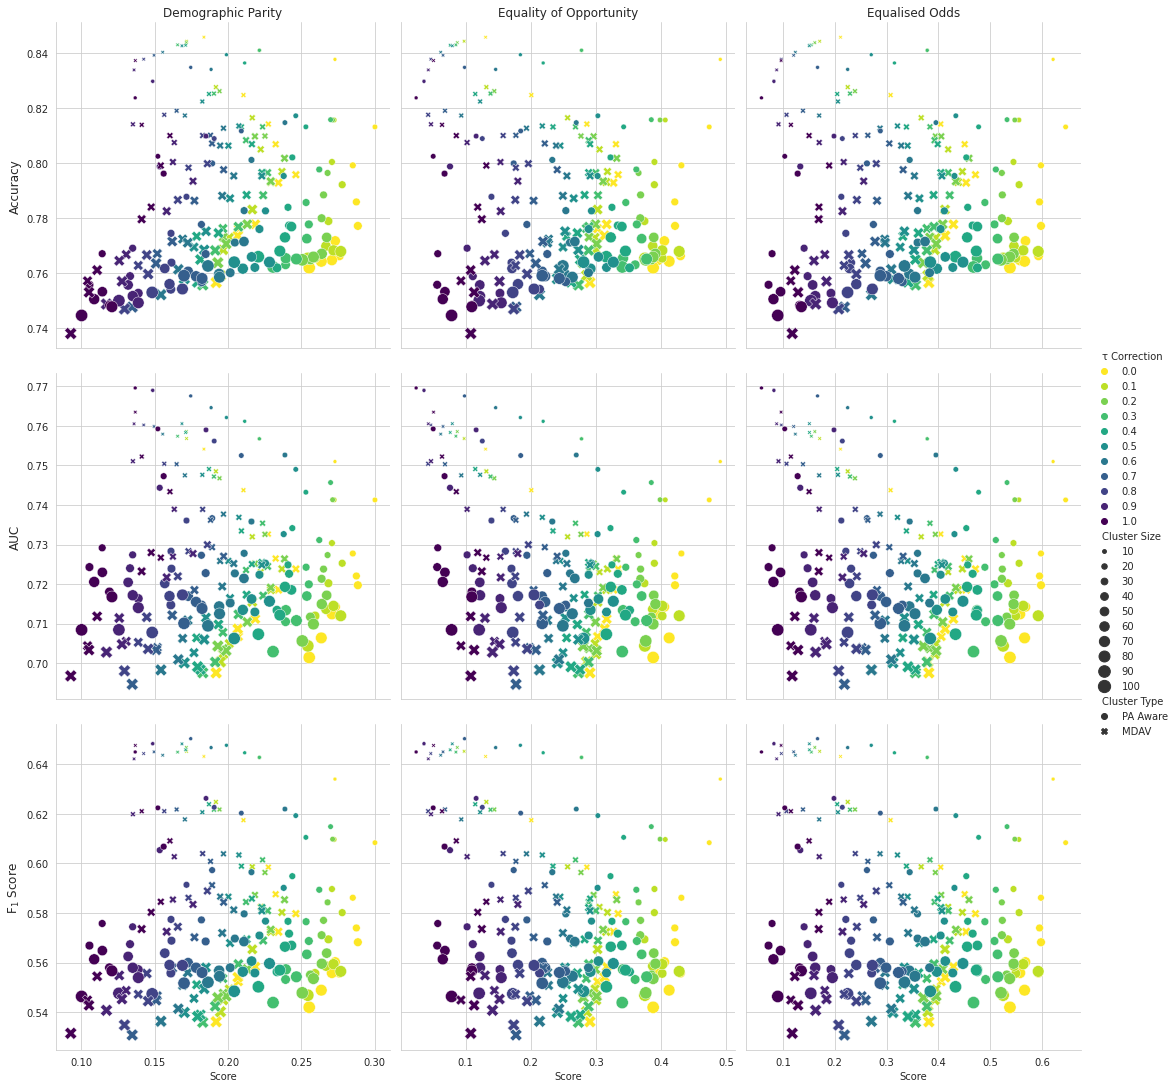

In [19]:
with sns.axes_style('whitegrid'):
    g = sns.relplot(
        data=melt_df[melt_df.epsilon.isnull()
                     & (melt_df.micro_agg == 1)
                     & (melt_df.neg_corr == 0)],
        x='fair_val', y='perf_val', col='fair_name', row='perf_name',
        hue='τ Correction', size='Cluster Size', style='Cluster Type',
        sizes=(15, 150), palette='viridis_r', legend='full',
        facet_kws={'sharey': 'row', 'sharex': 'col'}
    )
    
    xlabs = ['Demographic Parity', 'Equality of Opportunity', 'Equalised Odds'] + ['']*6
    ylabs = ['Accuracy']*3 + ['AUC']*3 + ['F$_1$ Score']*3
    for ax, x, y in zip(g.axes.flat, xlabs, ylabs):
        ax.set_title(x, fontsize='large')
        ax.set_ylabel(y, fontsize='large')
        ax.set_xlabel('Score')